In [1]:
import lifesim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.offsetbox import AnchoredText
from matplotlib.lines import Line2D

In [2]:
bus_0 = lifesim.Bus()
bus_0.build_from_config(filename='/home/ipa/quanz/user_accounts/fdannert/spie_22/40_experiments/S00_lifesim/S00_lifesim.yaml')

bus_0.data.import_catalog(input_path='/home/ipa/quanz/user_accounts/fdannert/spie_22/40_experiments/S00_lifesim/'
                                   'S00_lifesim.hdf5',
                        noise_catalog=False)

Importing Catalog...


KeyboardInterrupt: 

In [3]:
bus_1 = lifesim.Bus()
bus_1.build_from_config(filename='/home/ipa/quanz/user_accounts/fdannert/spie_22/40_experiments/S01_Lay/S01_base.yaml')

bus_1.data.import_catalog(input_path='/home/ipa/quanz/user_accounts/fdannert/spie_22/40_experiments/S01_Lay/'
                                   'S01_base.hdf5',
                        noise_catalog=True)

Importing Catalog...
[Done]
Importing Noise Catalog...
[Done]


In [4]:
ana = lifesim.SampleAnalysisModule(name='ana')
bus_1.add_module(ana)

ana.get_fundamental_snr()

## Difference in raw SNR

In [5]:
bus_0.data.catalog = bus_0.data.catalog.sort_values('id')
bus_1.data.catalog = bus_1.data.catalog.sort_values('id')
bus_0.data.catalog = bus_0.data.catalog.set_index('id')
bus_1.data.catalog = bus_1.data.catalog.set_index('id')

In [6]:
bins = np.logspace(int(np.log10(bus_0.data.catalog.z.min())), 
                   np.log10(bus_0.data.catalog.z.max()), 
                   60, 
                   endpoint=True)
bins_mid = bins[1:]-bins[:-1]
upper = np.zeros_like(bins_mid)
lower = np.zeros_like(bins_mid)

delta_snr = ((bus_0.data.catalog['snr_1h'] - bus_1.data.catalog['snr_1h']) 
             / (bus_0.data.catalog['snr_1h'] + bus_1.data.catalog['snr_1h']) 
             * 2)

ez_z = bus_0.data.catalog.z

for i in range(len(bins_mid)):
    mask = np.logical_and(ez_z > bins[i], ez_z <= bins[i+1])
    upper[i] = delta_snr[np.logical_and(mask, delta_snr >= 0)].median()
    lower[i] = delta_snr[np.logical_and(mask, delta_snr < 0)].median()

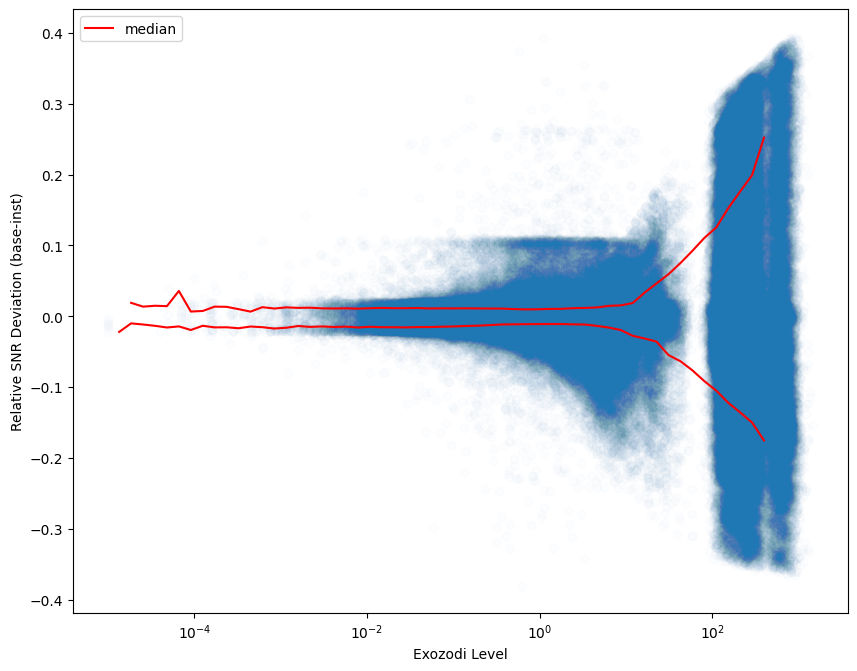

In [7]:
fig, ax = plt.subplots(dpi=100, figsize=(10, 8))
plt.scatter(bus_0.data.catalog['z'], (
    (bus_0.data.catalog['snr_1h'] - bus_1.data.catalog['snr_1h'])
    /
    (bus_0.data.catalog['snr_1h'] + bus_1.data.catalog['snr_1h']) * 2), alpha=0.01)
plt.plot(bins_mid, upper, color='red', label='median')
plt.plot(bins_mid, lower, color='red')
plt.xscale('log')
plt.xlabel('Exozodi Level')
plt.ylabel('Relative SNR Deviation (base-inst)')
plt.legend()
plt.show()

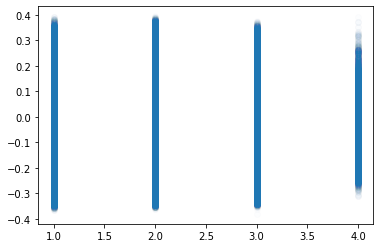

In [8]:
plt.scatter(bus_0.data.catalog['stype'], (
    (bus_0.data.catalog['snr_1h'] - bus_1.data.catalog['snr_1h'])
    /
    (bus_0.data.catalog['snr_1h'] + bus_1.data.catalog['snr_1h']) * 2), alpha=0.01)

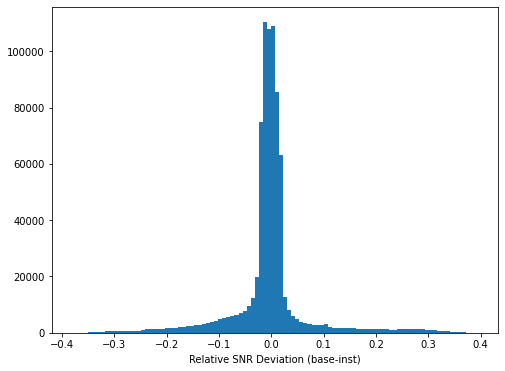

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.hist((
    (bus_0.data.catalog['snr_1h'] - bus_1.data.catalog['snr_1h'])
    /
    (bus_0.data.catalog['snr_1h'] + bus_1.data.catalog['snr_1h']) * 2), bins=100)
plt.xlabel('Relative SNR Deviation (base-inst)')
plt.show()

In [10]:
print(delta_snr.mean())
print(np.std(delta_snr))

-0.00337441048386442
0.073955454738034


## Difference in Yield

In [11]:
opt_0 = lifesim.Optimizer(name='opt_0')
bus_0.add_module(opt_0)
ahgs_0 = lifesim.AhgsModule(name='ahgs_0')
bus_0.add_module(ahgs_0)

bus_0.connect(('opt_0', 'ahgs_0'))
opt_0.ahgs()

[0.    0.    0.    0.    0.418]
[0.    0.    0.    0.    0.814]
[0.    0.    0.    0.    0.828]
[0.   0.   0.   0.   0.83]
[0.   0.   0.   0.   1.17]
[0.    0.    0.    0.    1.466]
[0.   0.   0.   0.   1.75]
[0.   0.   0.   0.   2.07]
[0.    0.    0.    0.    2.092]
[0.    0.    0.    0.    2.102]
[0.   0.   0.   0.   2.38]
[0.    0.    0.    0.    2.646]
[0.    0.    0.    0.    2.654]
[0.    0.    0.    0.    2.672]
[0.    0.    0.    0.    2.898]
[0.    0.    0.    0.    3.168]
[0.    0.    0.    0.    3.182]
[0.    0.    0.    0.    3.194]
[0.    0.    0.    0.    3.204]
[0.    0.    0.    0.    3.468]
[0.    0.    0.    0.    3.692]
[0.    0.    0.    0.    3.712]
[0.    0.    0.    0.    3.736]
[0.   0.   0.   0.   3.98]
[0.    0.    0.    0.    4.234]
[0.    0.    0.    0.    4.494]
[0.   0.   0.   0.   4.55]
[0.   0.   0.   0.   4.57]
[0.   0.   0.   0.   4.58]
[0.    0.    0.    0.    4.586]
[0.    0.    0.    0.    4.844]
[0.    0.    0.    0.    5.052]
[0.    0.    0.    0.

[ 0.     0.     0.136  0.742 16.646]
[ 0.     0.     0.136  0.742 16.658]
[ 0.     0.     0.136  0.742 16.664]
[ 0.     0.     0.136  0.838 16.664]
[ 0.     0.     0.136  0.838 16.774]
[ 0.     0.     0.142  0.838 16.774]
[ 0.     0.     0.142  0.838 16.792]
[ 0.     0.     0.142  0.838 16.806]
[ 0.     0.     0.142  0.838 16.844]
[ 0.     0.     0.142  0.838 16.892]
[ 0.     0.     0.142  0.838 16.902]
[ 0.     0.     0.142  0.838 16.95 ]
[ 0.     0.     0.142  0.838 16.99 ]
[ 0.     0.     0.142  0.838 16.996]
[ 0.     0.     0.142  0.838 17.056]
[ 0.     0.     0.142  0.838 17.09 ]
[ 0.     0.     0.142  0.838 17.102]
[ 0.     0.     0.142  0.838 17.114]
[ 0.     0.     0.142  0.838 17.15 ]
[ 0.     0.     0.142  0.838 17.166]
[ 0.     0.     0.142  0.838 17.246]
[ 0.     0.     0.144  0.838 17.246]
[ 0.     0.     0.144  0.838 17.25 ]
[ 0.     0.     0.144  0.838 17.254]
[ 0.     0.     0.144  0.842 17.254]
[ 0.     0.     0.164  0.842 17.254]
[ 0.     0.     0.164  0.842 17.296]
[

[ 0.     0.     0.236  1.58  24.024]
[ 0.     0.     0.236  1.58  24.072]
[ 0.     0.     0.236  1.58  24.088]
[ 0.     0.     0.236  1.58  24.098]
[ 0.     0.     0.236  1.58  24.212]
[ 0.     0.     0.236  1.58  24.246]
[ 0.     0.     0.236  1.58  24.27 ]
[ 0.     0.     0.236  1.58  24.292]
[ 0.     0.     0.236  1.626 24.292]
[ 0.     0.     0.236  1.626 24.3  ]
[ 0.     0.     0.236  1.626 24.324]
[ 0.     0.     0.236  1.626 24.362]
[ 0.     0.     0.236  1.626 24.364]
[ 0.     0.     0.236  1.626 24.402]
[ 0.     0.     0.236  1.626 24.43 ]
[ 0.     0.     0.236  1.626 24.444]
[ 0.     0.     0.236  1.64  24.444]
[ 0.     0.     0.236  1.64  24.446]
[ 0.     0.     0.236  1.64  24.52 ]
[ 0.     0.     0.236  1.64  24.534]
[ 0.     0.     0.236  1.64  24.616]
[ 0.     0.     0.236  1.64  24.626]
[ 0.     0.     0.236  1.64  24.664]
[ 0.     0.     0.236  1.64  24.694]
[ 0.     0.     0.236  1.64  24.698]
[ 0.     0.     0.236  1.64  24.72 ]
[ 0.     0.     0.236  1.64  24.798]
[

[ 0.     0.     0.37   2.036 30.98 ]
[ 0.     0.     0.37   2.092 30.98 ]
[ 0.     0.     0.37   2.092 31.014]
[ 0.     0.     0.37   2.092 31.03 ]
[ 0.     0.     0.37   2.092 31.056]
[ 0.     0.     0.37   2.092 31.062]
[ 0.     0.     0.37   2.092 31.12 ]
[ 0.     0.     0.37   2.092 31.218]
[ 0.     0.     0.37   2.092 31.228]
[ 0.     0.     0.37   2.092 31.23 ]
[ 0.     0.     0.37   2.092 31.268]
[ 0.     0.     0.37   2.092 31.276]
[ 0.     0.     0.37   2.092 31.298]
[ 0.     0.     0.37   2.092 31.322]
[ 0.     0.     0.37   2.092 31.348]
[ 0.     0.     0.37   2.092 31.356]
[ 0.     0.     0.37   2.092 31.36 ]
[ 0.     0.     0.37   2.092 31.408]
[ 0.     0.     0.37   2.092 31.448]
[ 0.     0.     0.37   2.092 31.46 ]
[ 0.     0.     0.378  2.092 31.46 ]
[ 0.     0.     0.378  2.092 31.474]
[ 0.     0.     0.378  2.092 31.486]
[ 0.     0.     0.378  2.108 31.486]
[ 0.     0.     0.378  2.108 31.518]
[ 0.     0.     0.378  2.108 31.568]
[ 0.     0.     0.378  2.108 31.604]
[

[0.0000e+00 3.0000e-02 4.7200e-01 3.0020e+00 3.6204e+01]
[0.0000e+00 3.0000e-02 4.7200e-01 3.0440e+00 3.6204e+01]
[0.0000e+00 3.0000e-02 4.7200e-01 3.0440e+00 3.6292e+01]
[0.0000e+00 3.0000e-02 4.7200e-01 3.0440e+00 3.6294e+01]
[0.0000e+00 3.0000e-02 4.7200e-01 3.0440e+00 3.6308e+01]
[0.0000e+00 3.0000e-02 4.7200e-01 3.0440e+00 3.6332e+01]
[0.0000e+00 3.0000e-02 4.7200e-01 3.0440e+00 3.6454e+01]
[0.0000e+00 3.0000e-02 4.7200e-01 3.0440e+00 3.6482e+01]
[0.0000e+00 3.0000e-02 4.7200e-01 3.0440e+00 3.6518e+01]
[0.0000e+00 3.0000e-02 4.7200e-01 3.0440e+00 3.6554e+01]
[0.0000e+00 3.0000e-02 4.7200e-01 3.0440e+00 3.6572e+01]
[0.0000e+00 3.0000e-02 4.7200e-01 3.0440e+00 3.6592e+01]
[0.0000e+00 3.0000e-02 4.7200e-01 3.0440e+00 3.6648e+01]
[0.0000e+00 3.0000e-02 4.7200e-01 3.0440e+00 3.6698e+01]
[0.0000e+00 3.0000e-02 4.7200e-01 3.0920e+00 3.6698e+01]
[0.000e+00 3.000e-02 4.720e-01 3.092e+00 3.670e+01]
[0.0000e+00 3.0000e-02 4.7200e-01 3.0920e+00 3.6742e+01]
[0.0000e+00 3.0000e-02 4.7200e-01 3.

In [12]:
opt_1 = lifesim.Optimizer(name='opt_1')
bus_1.add_module(opt_1)
ahgs_1 = lifesim.AhgsModule(name='ahgs_1')
bus_1.add_module(ahgs_1)

bus_1.connect(('opt_1', 'ahgs_1'))
opt_1.ahgs()

[0.    0.    0.    0.    0.424]
[0.    0.    0.    0.    0.826]
[0.    0.    0.    0.    1.142]
[0.    0.    0.    0.    1.448]
[0.    0.    0.    0.    1.734]
[0.    0.    0.    0.    2.054]
[0.    0.    0.    0.    2.058]
[0.   0.   0.   0.   2.08]
[0.  0.  0.  0.  2.1]
[0.    0.    0.    0.    2.374]
[0.    0.    0.    0.    2.644]
[0.    0.    0.    0.    2.652]
[0.    0.    0.    0.    2.654]
[0.    0.    0.    0.    2.894]
[0.    0.    0.    0.    3.204]
[0.    0.    0.    0.    3.222]
[0.   0.   0.   0.   3.45]
[0.    0.    0.    0.    3.688]
[0.    0.    0.    0.    3.708]
[0.    0.    0.    0.    3.946]
[0.    0.    0.    0.    3.956]
[0.    0.    0.    0.    4.016]
[0.    0.    0.    0.    4.056]
[0.    0.    0.    0.    4.324]
[0.    0.    0.    0.    4.574]
[0.    0.    0.    0.    4.578]
[0.  0.  0.  0.  4.6]
[0.    0.    0.    0.    4.608]
[0.    0.    0.    0.    4.612]
[0.   0.   0.   0.   4.62]
[0.    0.    0.    0.    4.858]
[0.   0.   0.   0.   4.86]
[0.    0.    0. 

[ 0.     0.     0.138  0.776 16.136]
[ 0.     0.     0.138  0.776 16.148]
[ 0.     0.     0.138  0.776 16.164]
[ 0.     0.     0.138  0.776 16.202]
[ 0.     0.     0.138  0.776 16.21 ]
[ 0.     0.     0.138  0.776 16.216]
[ 0.     0.     0.138  0.776 16.226]
[ 0.     0.     0.138  0.776 16.236]
[ 0.     0.     0.138  0.776 16.412]
[ 0.     0.     0.138  0.776 16.418]
[ 0.     0.     0.138  0.776 16.536]
[ 0.     0.     0.138  0.776 16.556]
[ 0.     0.     0.138  0.872 16.556]
[ 0.     0.     0.138  0.872 16.562]
[ 0.     0.     0.138  0.872 16.568]
[ 0.     0.     0.138  0.872 16.594]
[ 0.     0.     0.138  0.872 16.648]
[ 0.     0.     0.138  0.872 16.654]
[ 0.     0.     0.138  0.872 16.746]
[ 0.     0.     0.138  0.872 16.79 ]
[ 0.     0.     0.138  0.872 16.81 ]
[ 0.     0.     0.138  0.872 16.828]
[ 0.     0.     0.138  0.872 16.832]
[ 0.     0.     0.138  0.872 16.852]
[ 0.     0.     0.138  0.872 16.876]
[ 0.     0.     0.138  0.872 16.878]
[ 0.     0.     0.166  0.872 16.878]
[

[ 0.     0.     0.28   1.67  23.082]
[ 0.     0.     0.28   1.708 23.082]
[ 0.     0.     0.28   1.708 23.094]
[ 0.     0.     0.28   1.708 23.096]
[ 0.     0.     0.28   1.708 23.098]
[ 0.     0.     0.28   1.708 23.104]
[ 0.     0.     0.28   1.708 23.112]
[ 0.     0.     0.28   1.708 23.13 ]
[ 0.     0.     0.28   1.708 23.156]
[ 0.     0.     0.28   1.73  23.156]
[ 0.     0.     0.304  1.73  23.156]
[ 0.     0.     0.304  1.73  23.252]
[ 0.     0.     0.304  1.73  23.278]
[ 0.     0.     0.304  1.73  23.28 ]
[ 0.     0.     0.304  1.73  23.304]
[ 0.     0.     0.304  1.73  23.33 ]
[ 0.     0.     0.304  1.73  23.332]
[ 0.     0.     0.304  1.73  23.338]
[ 0.     0.     0.304  1.73  23.346]
[ 0.     0.     0.304  1.73  23.352]
[ 0.     0.     0.304  1.73  23.372]
[ 0.     0.     0.304  1.73  23.448]
[ 0.     0.     0.304  1.73  23.516]
[ 0.     0.     0.304  1.73  23.548]
[ 0.     0.     0.304  1.73  23.572]
[ 0.     0.     0.304  1.73  23.584]
[ 0.     0.     0.304  1.73  23.594]
[

[ 0.     0.     0.384  2.018 29.586]
[ 0.     0.     0.384  2.018 29.606]
[ 0.     0.     0.384  2.018 29.654]
[ 0.     0.     0.384  2.018 29.714]
[ 0.     0.     0.384  2.018 29.784]
[ 0.     0.     0.384  2.018 29.79 ]
[ 0.     0.     0.384  2.018 29.848]
[ 0.     0.     0.384  2.018 29.866]
[ 0.     0.     0.384  2.018 29.888]
[ 0.     0.     0.384  2.018 29.916]
[ 0.     0.     0.384  2.018 29.922]
[ 0.     0.     0.384  2.018 29.924]
[ 0.     0.     0.384  2.018 30.006]
[ 0.     0.     0.384  2.018 30.016]
[ 0.     0.     0.384  2.018 30.052]
[ 0.     0.     0.384  2.018 30.056]
[ 0.     0.     0.384  2.018 30.102]
[ 0.     0.     0.384  2.05  30.102]
[ 0.     0.     0.384  2.07  30.102]
[ 0.     0.     0.384  2.07  30.158]
[ 0.     0.     0.384  2.07  30.184]
[ 0.     0.     0.384  2.07  30.224]
[ 0.     0.     0.384  2.07  30.226]
[ 0.     0.     0.384  2.07  30.236]
[ 0.     0.     0.384  2.07  30.242]
[ 0.     0.     0.384  2.07  30.318]
[ 0.     0.     0.384  2.07  30.332]
[

[ 0.    0.    0.41  2.95 34.99]
[ 0.     0.     0.41   2.95  34.992]
[ 0.     0.     0.41   2.95  35.006]
[ 0.     0.     0.41   2.95  35.084]
[ 0.    0.    0.41  2.95 35.1 ]
[ 0.     0.     0.41   2.95  35.114]
[ 0.     0.     0.41   3.02  35.114]
[ 0.     0.     0.41   3.02  35.206]
[ 0.     0.     0.41   3.02  35.234]
[ 0.     0.     0.458  3.02  35.234]
[ 0.     0.     0.458  3.02  35.246]
[ 0.     0.058  0.458  3.02  35.246]
[ 0.     0.058  0.458  3.02  35.264]
[ 0.     0.058  0.458  3.02  35.266]
[ 0.     0.058  0.458  3.02  35.272]
[ 0.     0.058  0.458  3.02  35.316]
[ 0.     0.058  0.458  3.02  35.328]
[ 0.     0.058  0.458  3.02  35.374]
[ 0.     0.058  0.458  3.02  35.426]
[ 0.     0.058  0.458  3.02  35.468]
[ 0.     0.058  0.458  3.02  35.47 ]
[ 0.     0.058  0.458  3.02  35.496]
[ 0.     0.058  0.458  3.02  35.554]
[ 0.     0.058  0.458  3.02  35.626]
[ 0.     0.058  0.458  3.02  35.65 ]
[ 0.     0.058  0.458  3.034 35.65 ]
[ 0.     0.058  0.458  3.034 35.656]
[ 0.     0.

In [13]:
yields = pd.DataFrame(columns=['number', 'method', 'stype'], index=np.arange(8))
stype = ['F', 'G', 'K', 'M']

In [14]:
for i in range(1, 5):
    yields.number.iloc[i-1] = bus_0.data.catalog.detected[bus_0.data.catalog.stype==i].sum()/500
    yields.method.iloc[i-1] = 'lifesim'
    yields.stype.iloc[i-1] = stype[i-1]
    
    yields.number.iloc[i+3] = bus_1.data.catalog.detected[bus_1.data.catalog.stype==i].sum()/500
    yields.method.iloc[i+3] = 'inlifesim'
    yields.stype.iloc[i+3] = stype[i-1]

Text(0, 0.5, 'Total Yield')

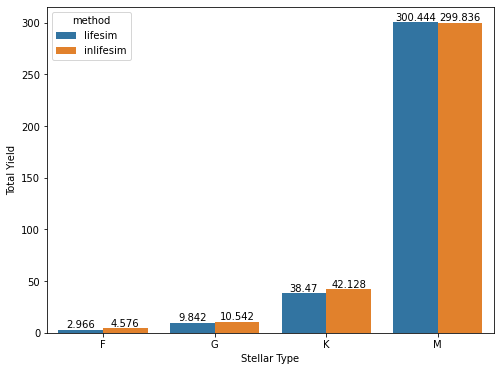

In [15]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x="stype", y="number", hue="method", data=yields)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Stellar Type')
plt.ylabel('Total Yield')

Text(0, 0.5, 'eHZ Yield')

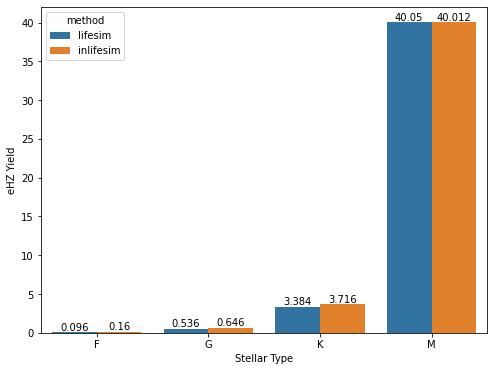

In [16]:
yields_hab = pd.DataFrame(columns=['number', 'method', 'stype'], index=np.arange(8))

for i in range(1, 5):
    yields_hab.number.iloc[i-1] = bus_0.data.catalog.detected[np.logical_and(bus_0.data.catalog.stype==i, bus_0.data.catalog.habitable)].sum()/500
    yields_hab.method.iloc[i-1] = 'lifesim'
    yields_hab.stype.iloc[i-1] = stype[i-1]
    
    yields_hab.number.iloc[i+3] = bus_1.data.catalog.detected[np.logical_and(bus_1.data.catalog.stype==i, bus_1.data.catalog.habitable)].sum()/500
    yields_hab.method.iloc[i+3] = 'inlifesim'
    yields_hab.stype.iloc[i+3] = stype[i-1]

fig, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x="stype", y="number", hue="method", data=yields_hab)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Stellar Type')
plt.ylabel('eHZ Yield')

## Difference in detection efficiency / completeness

In [17]:
class SamplePlot(object):
    def __init__(self,
                 catalog):
        self.cat = catalog

    def completeness_status_quo(self,
                                type: str,
                                save_post: str):
        """
        Used insolation equal luminosity over distance squared
        :return:
        """

        palette = ['#3D4F7D',  # bins
                   '#C14927',  # contour lower detection efficiency
                   '#E5A01E',  # contour upper detection efficiency
                   '#0D2127',  # text
                   '#637022',  # contour lower completeness
                   '#9CB035',  # contour upper completeness
                   ]

        self.get_insolation()

        nMC = self.cat.nuniverse.max() + 1

        bins_insol_coarse = np.logspace(-2, 3, 11)
        bins_insol_fine = np.logspace(-2, 3, 46)
        bins_insol_labels = ['$10^{-2}$','$10^{-1.5}$', '$10^{-1}$', '$10^{-0.5}$', '$10^{0}$',
                             '$10^{0.5}$', '$10^{1}$', '$10^{1.5}$', '$10^{2}$', '$10^{2.5}$',
                             '$10^{3}$']

        bins_Rp_coarse = np.array([0.50, 1.5, 3.0, 6.00])

        bins_Rp_fine = np.concatenate([np.linspace(0.5, 1.5, 5, endpoint=False),
                                       np.linspace(1.5, 3.0, 5, endpoint=False),
                                       np.linspace(3.0, 6.0, 6, endpoint=True)])

        cond_mask = self.cat.detected
        obs_mask = self.cat.int_time > 0

        #----- Maurices Code

        H_all, _, _ = np.histogram2d(x=self.cat.radius_p,
                                     y=self.cat.insol_p,
                                     bins=[bins_Rp_coarse, bins_insol_coarse])
        H, _, _ = np.histogram2d(x=self.cat.radius_p[cond_mask],
                                 y=self.cat.insol_p[cond_mask],
                                 bins=[bins_Rp_coarse, bins_insol_coarse])

        H_list = [np.histogram2d(x=self.cat.radius_p[cond_mask][self.cat.nuniverse[cond_mask] == i],
                                 y=self.cat.insol_p[cond_mask][self.cat.nuniverse[cond_mask] == i],
                                 bins=[bins_Rp_coarse, bins_insol_coarse])[0] for i in range(nMC)]
        H_list = np.array(H_list)

        H_plot = H

        H_std = H_list.std(axis=0)

        H_frac = np.divide(H, H_all, out=np.zeros_like(H), where=H_all != 0)

        H_fine, _, _ = np.histogram2d(x=self.cat.radius_p[cond_mask],
                                      y=self.cat.insol_p[cond_mask],
                                      bins=[bins_Rp_fine, bins_insol_fine])

        H_obs_fine, _, _ = np.histogram2d(x=self.cat.radius_p[obs_mask],
                                          y=self.cat.insol_p[obs_mask],
                                          bins=[bins_Rp_fine, bins_insol_fine])

        H_all_fine, _, _ = np.histogram2d(x=self.cat.radius_p,
                                          y=self.cat.insol_p,
                                          bins=[bins_Rp_fine, bins_insol_fine])

        H_frac_fine = np.divide(H_fine, H_all_fine,
                                out=np.zeros_like(H_fine),
                                where=H_all_fine != 0)

        H_frac_obs = np.divide(H_fine, H_obs_fine,
                               out=np.zeros_like(H_fine),
                               where=H_obs_fine != 0)

        # Make figure
        fig = plt.figure(figsize=(6.4, 4.8))
        ax_hist2 = plt.axes()

        colors = ['white', palette[0]]
        cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)

        # Plot 2d histogram
        fine_grid = np.flipud(H_fine / float(nMC))
        # fine_grid = np.flipud(np.divide(H_frac_fine, H_frac_obs,
        #                                 out=np.zeros_like(H_fine),
        #                                 where=H_frac_obs != 0))
        # fine_grid = np.flipud(H_frac_obs)
        ax_hist2.imshow(fine_grid, alpha=1., cmap=cmap1,
                        aspect='auto', interpolation='none', #vmax=4.5,
                        extent=[0, H.shape[1], 0, H.shape[0]])

        txt1 = AnchoredText("Number of detectable planets", loc="upper center", pad=0.4,
                            prop=dict(fontsize=12), borderpad=0, )

        txt1.patch.set_linewidth(0.5)
        ax_hist2.add_artist(txt1)

        x, y = np.meshgrid(np.linspace(0.5, len(bins_insol_coarse) - 1.5,
                                       len(bins_insol_coarse) - 1),
                           np.linspace(0.5, len(bins_Rp_coarse) - 1.5, len(bins_Rp_coarse) - 1))

        for x_val, y_val in zip(x.flatten(), y.flatten()):
            ax_hist2.text(x_val, y_val, f"{H_plot[int(y_val), int(x_val)] / float(nMC):.0f}"
                          + "\n" + r"$\pm$" + f"{H_std[int(y_val), int(x_val)]:.0f}"
                          , va='center', ha='center', size=12, color=palette[3])

        # Completeness Contour
        z_lev = 3
        cmap2 = LinearSegmentedColormap.from_list("mycmap", [palette[1], palette[2]])
        cmap3 = LinearSegmentedColormap.from_list("mycmap", [palette[4], palette[5]])

        x, y = np.meshgrid(np.linspace(0, len(bins_insol_coarse) - 1,
                                       (len(bins_insol_fine) - 1) * z_lev),
                           np.linspace(0, len(bins_Rp_coarse) - 1, (len(bins_Rp_fine) - 1) * z_lev))
        if type == 'detection efficiency':
            H_frac_fine_z = sp.ndimage.zoom(H_frac_fine, z_lev)
            levels=[0.3, 0.4, 0.5]
            # levels=[0.5, 0.7, 0.9]
            # levels = [0.1, 0.3, 0.5, 0.7, 0.9]
            cmap = cmap2
            l_i = 1
            save = 'detection_efficiency'
            label = 'Detection Efficiency'
        elif type == 'completeness':
            H_frac_fine_z = sp.ndimage.zoom(H_frac_obs, z_lev)
            levels=[0.1, 0.3, 0.5, 0.7, 0.9]
            cmap = cmap3
            l_i = 4
            save = type
            label = 'Completeness'

        CT = ax_hist2.contour(x, y, H_frac_fine_z, levels=levels, cmap=cmap, label=type)
        ax_hist2.clabel(CT, inline=1, fontsize=10)

        # Set axes properties
        ax_hist2.set_xticks(range(len(bins_insol_coarse)))
        ax_hist2.set_xticklabels(bins_insol_labels, fontsize=12)
        ax_hist2.set_yticks(range(len(bins_Rp_coarse)))
        ax_hist2.set_yticklabels(bins_Rp_coarse, fontsize=12)

        # if data_x_name == "Fp":
        ax_hist2.set_xlabel('Stellar insolation [$S_\oplus$]', fontsize=15)
        ax_hist2.set_ylabel(r'Radius [$R_\oplus$]', fontsize=15)

        # Add grid
        for i in range(len(bins_insol_coarse) - 2):
            ax_hist2.axvline(x=i + 1, linestyle=':', linewidth=0.5, color='k')
        for i in range(len(bins_Rp_coarse) - 2):
            ax_hist2.axhline(y=i + 1, linestyle=':', linewidth=0.5, color='k')

        ax_hist2.legend([Line2D([0], [0], color=palette[l_i], lw=2)], [label], loc='lower left')
        #fig.savefig('/home/felix/Documents/MA/Figures/Thesis/' + save + save_post + '.pdf')
        plt.show()

    def get_insolation(self):
        self.cat['insol_p'] = self.cat.l_sun / (self.cat.semimajor_p ** 2)

/tmp/ipykernel_1802185/1952400757.py:138: UserWarning: The following kwargs were not used by contour: 'label'
  CT = ax_hist2.contour(x, y, H_frac_fine_z, levels=levels, cmap=cmap, label=type)


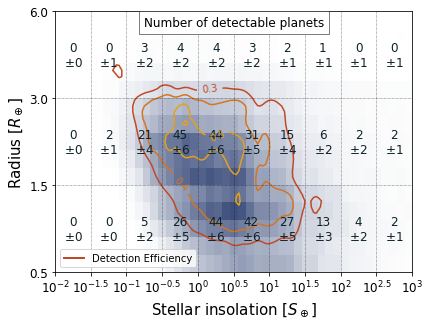

/tmp/ipykernel_1802185/1952400757.py:138: UserWarning: The following kwargs were not used by contour: 'label'
  CT = ax_hist2.contour(x, y, H_frac_fine_z, levels=levels, cmap=cmap, label=type)


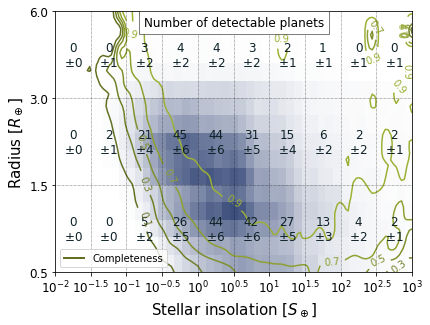

/tmp/ipykernel_1802185/1952400757.py:138: UserWarning: The following kwargs were not used by contour: 'label'
  CT = ax_hist2.contour(x, y, H_frac_fine_z, levels=levels, cmap=cmap, label=type)


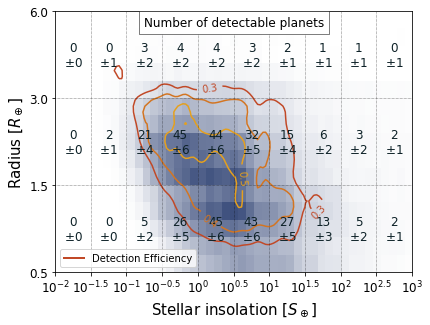

/tmp/ipykernel_1802185/1952400757.py:138: UserWarning: The following kwargs were not used by contour: 'label'
  CT = ax_hist2.contour(x, y, H_frac_fine_z, levels=levels, cmap=cmap, label=type)


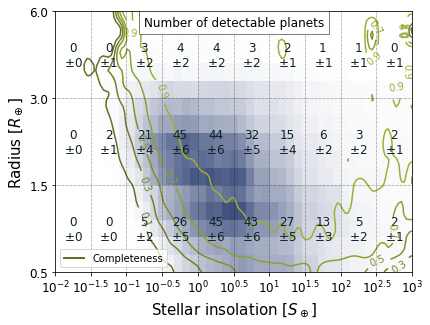

In [18]:
plot_0 = SamplePlot(bus_0.data.catalog)
plot_0.completeness_status_quo(type='detection efficiency',
                              save_post='test')
plot_0.completeness_status_quo(type='completeness',
                              save_post='test')

plot_1 = SamplePlot(bus_1.data.catalog)
plot_1.completeness_status_quo(type='detection efficiency',
                              save_post='test')
plot_1.completeness_status_quo(type='completeness',
                              save_post='test')

In [19]:
4.576/2.966

1.542818610923803

In [20]:
detected_id = bus_1.data.catalog[bus_1.data.catalog.detected].id

AttributeError: 'DataFrame' object has no attribute 'id'

In [ ]:
np.array(bus_1.data.noise_catalog[np.isin(bus_1.data.noise_catalog.ids, detected_id)].sel(params='signal')).max()